In [15]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [17]:
# Generate a synthetic dataset with 20 samples
data, _ = make_blobs(n_samples=20, centers=3, random_state=42, cluster_std=1.0)


AttributeError: 'NoneType' object has no attribute 'split'

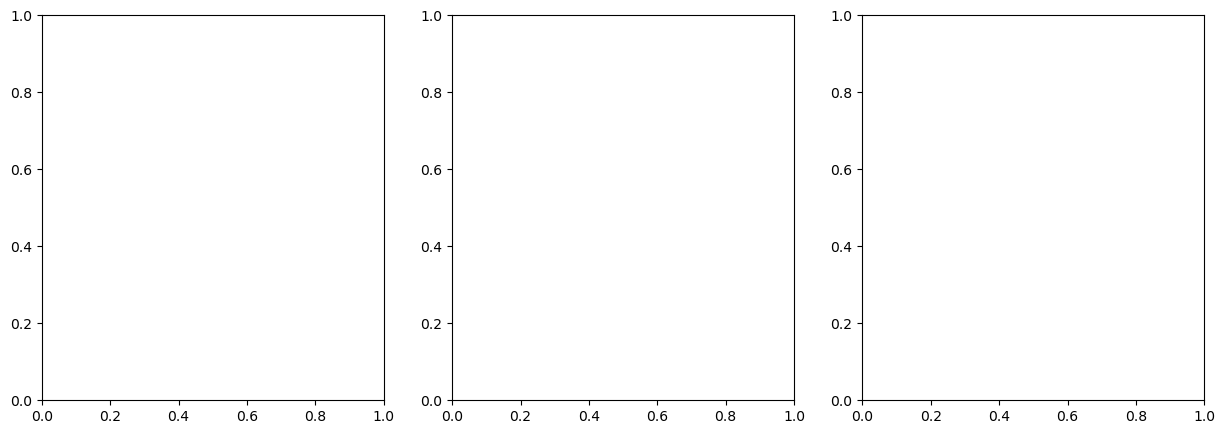

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over different values of k
for k, ax in zip(range(1, 4), axes):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Manually calculate inertia
    distances_squared = np.zeros(len(data))

    for i in range(len(data)):
        distances = np.sum((data[i] - kmeans.cluster_centers_[kmeans.labels_[i]])**2)
        distances_squared[i] = distances

    inertia = np.sum(distances_squared)

    # Visualize data points and clusters
    ax.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k', s=50)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax.set_title(f'K-means Clustering (k={k})\nManual Inertia: {np.round(inertia, 2)}')
    ax.legend()

plt.show()